# Transofrmation

### Transformations are very important techniques in bringing the data into normal form.
### Since we can derive more meaningful aspects from normal distribution, it is good practice to convert skewed distribution to a normal form by using transformations. There are different types of transformations such as
### Log transformer
### Reciprocal transformer
### Exponential transformer
### Box cox transformer
### Yeo Johnson transformer

# Log Transformer 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from feature_engine import variable_transformers as vt

In [4]:
data = pd.read_csv("houseprice.csv")

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

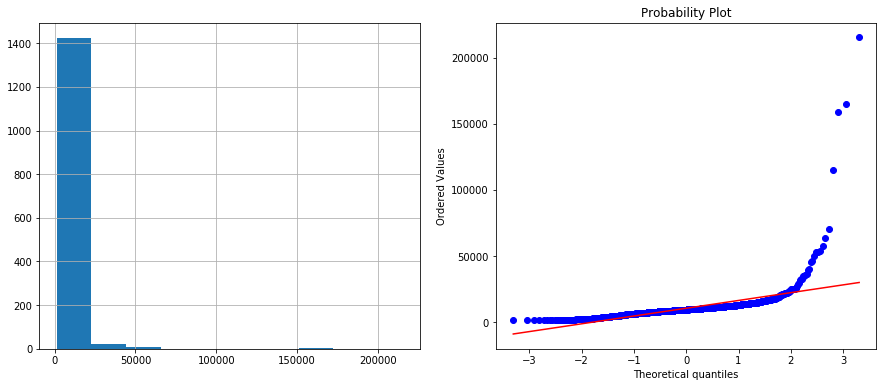

In [7]:
diagnostic_plots(data, 'LotArea')

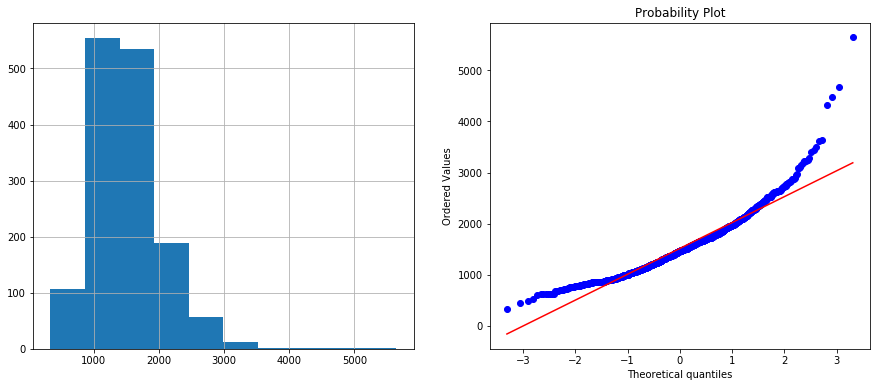

In [8]:
diagnostic_plots(data, 'GrLivArea')

In [9]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [10]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [11]:
data_tf = lt.transform(data)

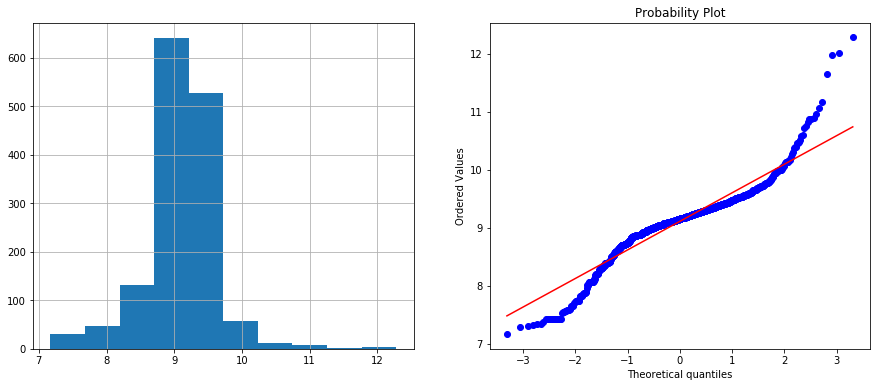

In [12]:
diagnostic_plots(data_tf, 'LotArea')

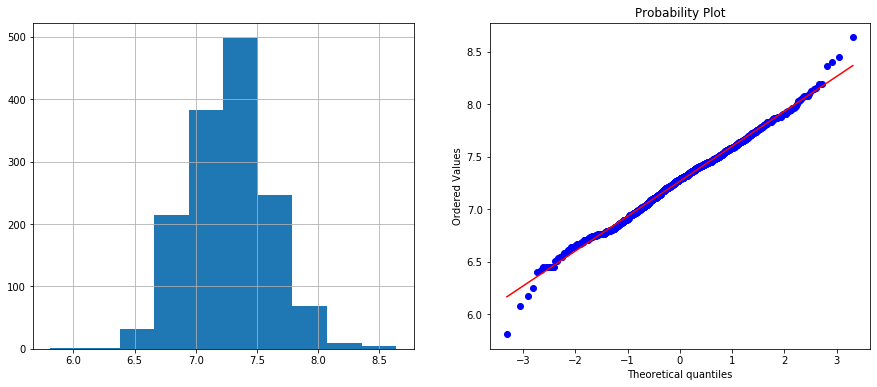

In [13]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

# Reciprocal Transformer

In [14]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [15]:
data_tf = rt.transform(data)

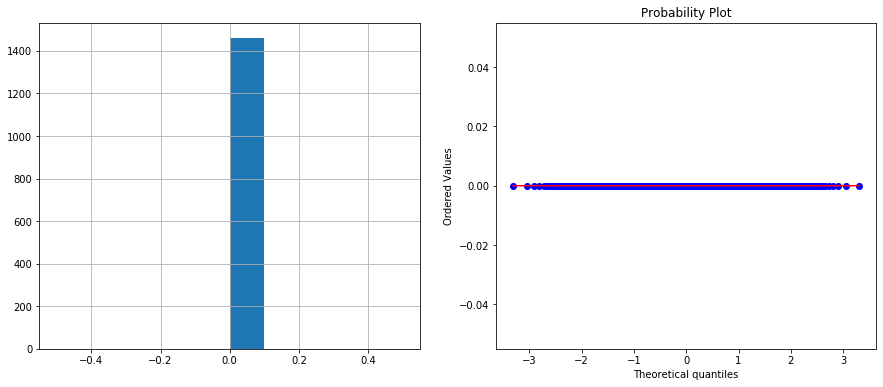

In [16]:
diagnostic_plots(data_tf, 'LotArea')

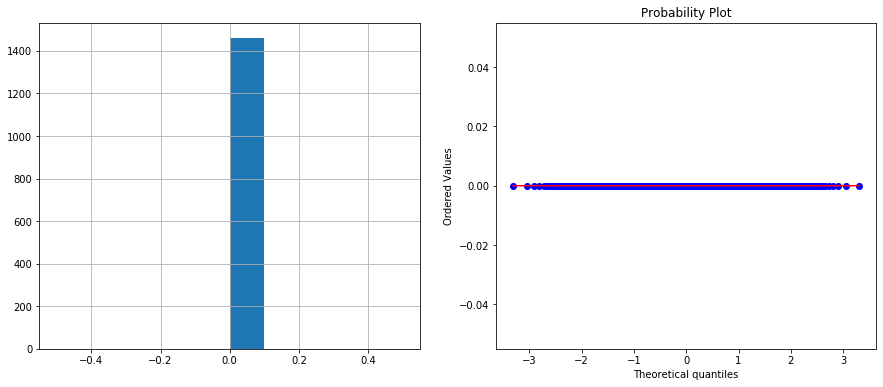

In [17]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

# Exponential Transformer

In [18]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

PowerTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [19]:
data_tf = et.transform(data)

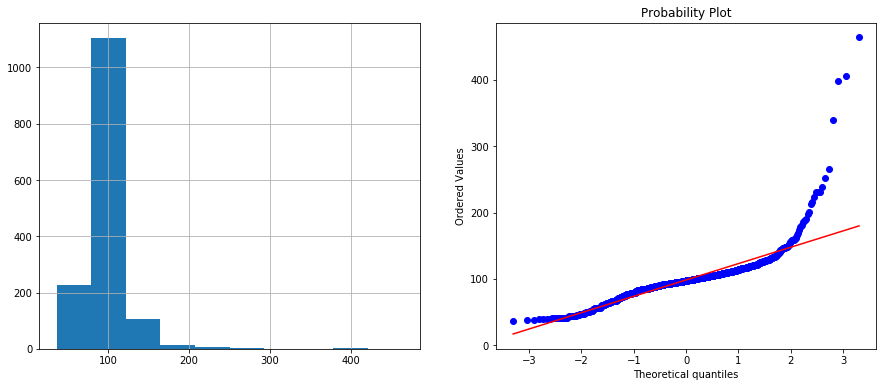

In [20]:
diagnostic_plots(data_tf, 'LotArea')

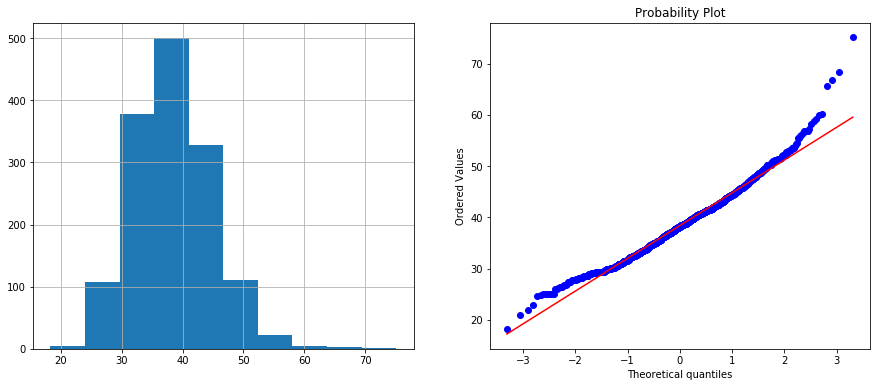

In [21]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

# Boxcox Transformation

In [22]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [23]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'LotArea': 0.03094631071248529, 'GrLivArea': 0.006304924353543215}

In [24]:
data_tf = bct.transform(data)

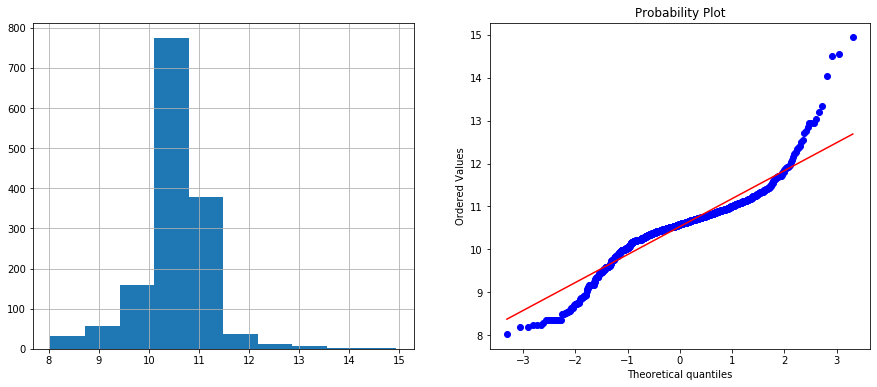

In [25]:
diagnostic_plots(data_tf, 'LotArea')

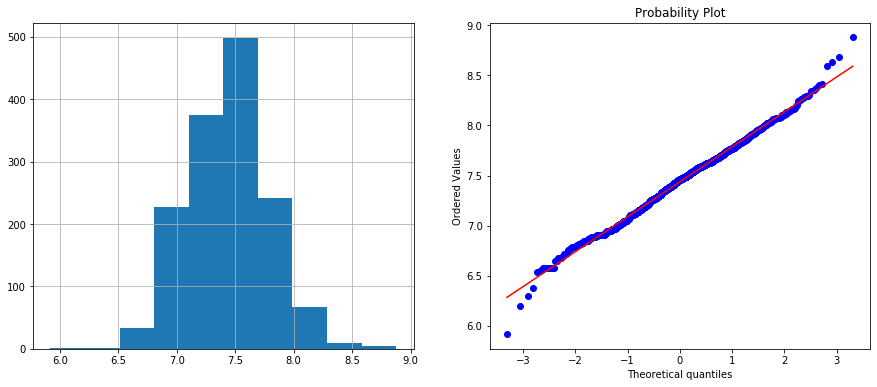

In [26]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

# Yeo Johnson Transformer

In [27]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])
yjt.fit(data)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [28]:
# these are the exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

{'LotArea': 0.03081854079393649, 'GrLivArea': 0.005539641278705955}

In [29]:
data_tf = yjt.transform(data)

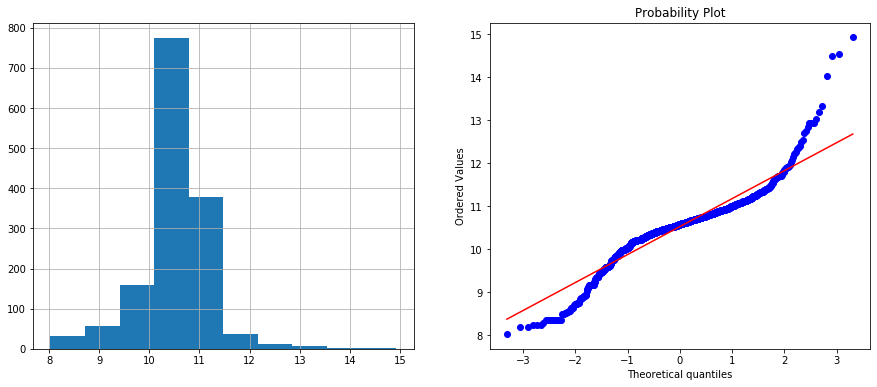

In [30]:
diagnostic_plots(data_tf, 'LotArea')

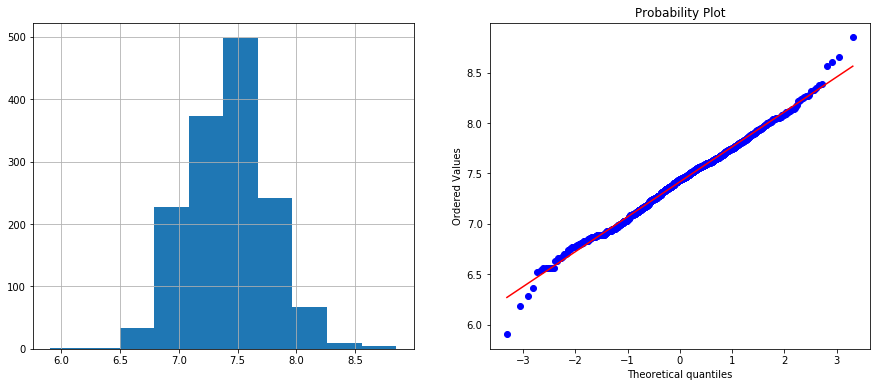

In [31]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

### It seems Yeo Johnson has slightly a better fir than others when seen through a QQ plot